## Project Title: Iris Species
# I will Classify iris plants into three species in this classic dataset.

In [1]:
# First I will import the main libraries to manage and plot datas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline 
#This code is to turn more practical when I want to see a graph.


In [2]:
# Now I will read the dataset.
iris = pd.read_csv('../input/Iris.csv')

In [3]:
# Let's see basic layouts about this data.
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# First of all, we can improve the title of the columns.
iris.columns = ['ID', 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species' ]

# Let's if this worked!
iris.head()

,ID,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
ID              150 non-null int64
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
# I want to see how much species there are.
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


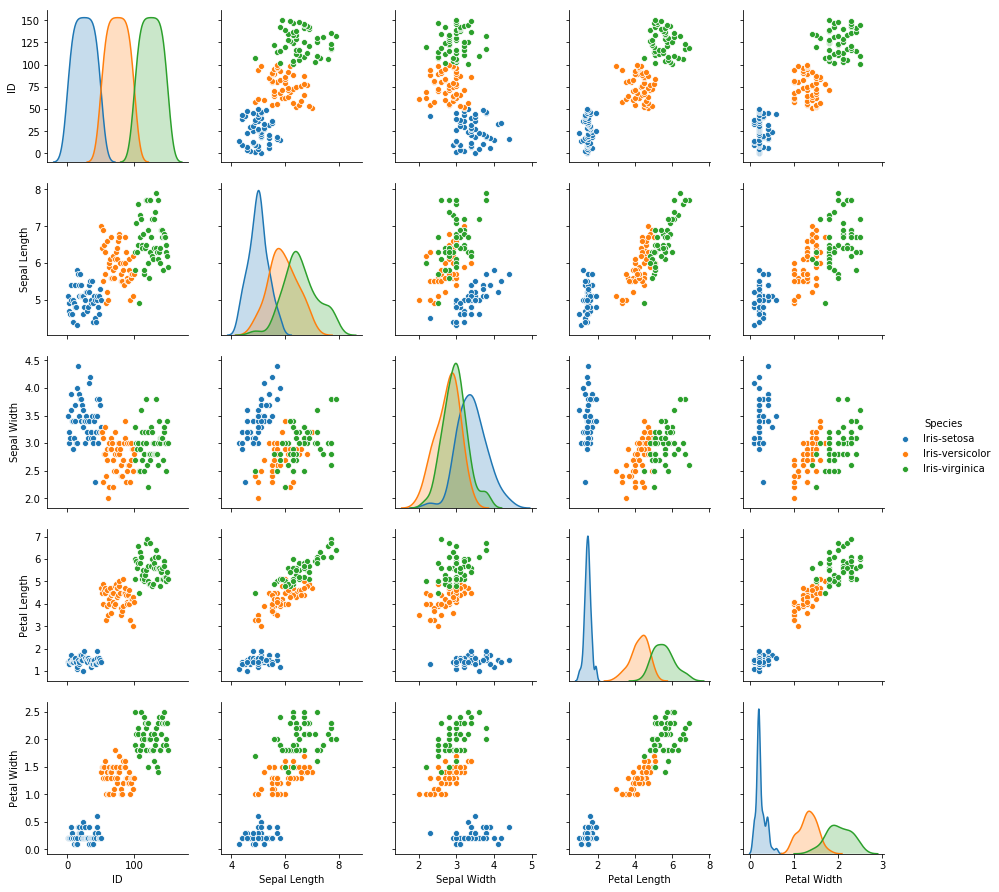

In [7]:
# I will start to build some graph to visualize data and guess what model will be better to use.
sns.pairplot(iris, hue='Species')

# I focus in "Species", because is my goal.

# With the task, which was given at the beginning, I knew I had to use the Classification Model.
# Looking this PairPlot, I can realize that the SVM algorithm woulb be the best option.

In [8]:
# First I will determinate the "X"and "y"values.

# The independent variables are the features of species: index 1,2,3 and 4.
X = iris.iloc[:,1:5]

# The dependent variable is the names of species: index 5.
y = iris.iloc[:,5]

# PS.: The "ID" is not necessary to my algorithmn.

In [9]:
# Let's check!
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [11]:
# Now it's time to separate in Train an Test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Let's check if the class done correctly the separation.
print(len(X_train))
print('\n')
print(len(y_train))

120


120


In [13]:
# that's fine! Now it's time to train in SVM algorithmn.
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
# Now we have to predict using our model.
y_pred = classifier.predict(X_test)

In [15]:
# Let's see with this model works!
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.92      1.00      0.96        12

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



[[ 8  0  0]
 [ 0  9  1]
 [ 0  0 12]]


# This model worked pretty good!
# That's it! I will see you in the next Project!